0.6044125990780156 0.7418660463477481
[-0.2243562] [ 0.04104333]
MSE: 1.01386289464
[ 1.01386289]


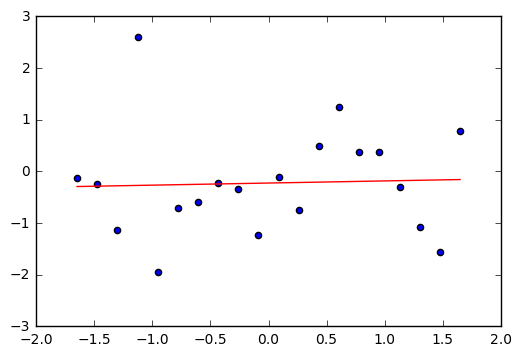

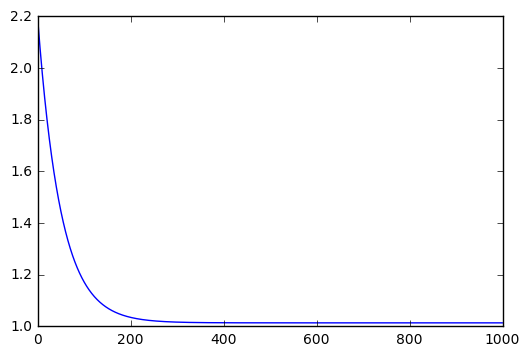

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def standardize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

num_data_points = 20

y = np.random.randn(num_data_points, 1)
x = np.arange(num_data_points, dtype='float32').reshape(num_data_points, 1)

# Initialize coefficients with random values
b0=np.random.random()
b1 =np.random.random()

cost_function_values = []

batch_size = 32

#mean_x = sum(xs) / len(xs)
#std_dev = math.sqrt(sum([(x - mean_x)**2 for x in xs]) / len(xs))
#xs = [(x - mean_x) / std_dev for x in xs]
# print(mean_x, std_dev)

x = standardize(x)

print(b0, b1)
num_batches = int(num_data_points / batch_size)


for e in range(1000):
#     random_idxs = np.random.shuffle(np.arange(num_data_points))
    epoch_losses = []

    for i in range(0, num_data_points, batch_size):
        error0, error1 = 0, 0
        batch_squared_error = 0
        num_processed_in_batch = 0
        for b in range(batch_size):
            if i + b == num_data_points:
                break
            
            num_processed_in_batch += 1
            pred = b0 + b1 * x[i + b]
            error = pred - y[i + b]
            batch_squared_error += error ** 2

            error0 += error
            error1 += error * x[i + b]
            
        b0 = b0 - 0.01 * error0 / num_processed_in_batch
        b1 = b1 - 0.01 * error1 / num_processed_in_batch
        if num_processed_in_batch:
            epoch_losses.append(batch_squared_error / num_processed_in_batch)
    
    if epoch_losses:
        cost_function_values.append(sum(epoch_losses) / len(epoch_losses))
    
print(b0, b1)



pred=b0+x*b1

mse = mean_squared_error(y, pred)

print('MSE:', mse)
print(cost_function_values[-1])

plt.scatter(x, y)
plt.plot(x, pred, color='red')
plt.show()

plt.plot(cost_function_values)
plt.show()

[-0.2243562] [ 0.04104333]
MSE: 1.01386289464
[ 1.01386289]


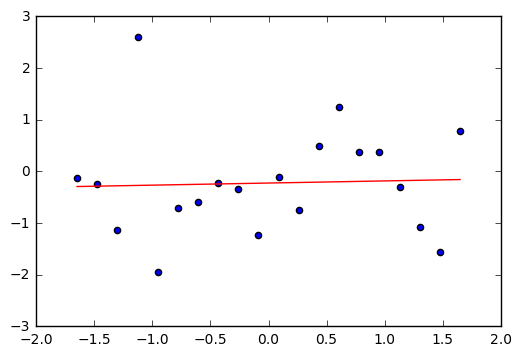

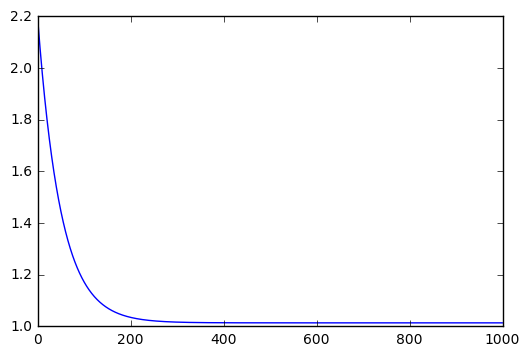

In [3]:
for e in range(1000):
#     random_idxs = np.random.shuffle(np.arange(num_data_points))
    epoch_losses = []

    for i in range(0, num_batches):
        
        #если еще есть num_batches то берем по batch_size иначе остаток
        if i<(num_batches-1):
            size=batch_size
        else:
            size=num_data_points%batch_size
        
        # к-переменная обозначающая начало среза
        k=i*batch_size
        sliceX=x[k:k+size]
        sliceY=y[k:k+size]
        
         #предсказывем значения целыи массивами вместо поэлементной работы
        predY=b0+sliceX*b1
        errorsY=predY-sliceY
        
        batch_squared_errorY=errorsY**2

            
        b0 = b0 - 0.01 * errorsY.sum / size
        b1 = b1 - 0.01 * (errorsY*sliceX).sum / size
        
        epoch_losses.append(batch_squared_errorY.sum / size)
        
        
    if epoch_losses:    
        cost_function_values.append(sum(epoch_losses) / len(epoch_losses))
    
print(b0, b1)

pred=b0+x*b1

mse = mean_squared_error(y, pred)

print('MSE:', mse)
print(cost_function_values[-1])

plt.scatter(x, y)
plt.plot(x, pred, color='red')
plt.show()

plt.plot(cost_function_values)
plt.show()